# 机器学习工程师纳米学位
## 入门
## 项目 0: 预测泰坦尼克号乘客生还率

1912年，泰坦尼克号在第一次航行中就与冰山相撞沉没，导致了大部分乘客和船员身亡。在这个入门项目中，我们将探索部分泰坦尼克号旅客名单，来确定哪些特征可以最好地预测一个人是否会生还。为了完成这个项目，你将需要实现几个基于条件的预测并回答下面的问题。我们将根据代码的完成度和对问题的解答来对你提交的项目的进行评估。 

> **提示**：这样的文字将会指导你如何使用 iPython Notebook 来完成项目。

点击[这里](https://github.com/udacity/machine-learning/blob/master/projects/titanic_survival_exploration/Titanic_Survival_Exploration.ipynb)查看本文件的英文版本。

# 开始

当我们开始处理泰坦尼克号乘客数据时，会先导入我们需要的功能模块以及将数据加载到 `pandas` DataFrame。运行下面区域中的代码加载数据，并使用 `.head()` 函数显示前几项乘客数据。 

> **提示**：你可以通过单击代码区域，然后使用键盘快捷键 **Shift+Enter** 或 **Shift+ Return** 来运行代码。或者在选择代码后使用**播放**（run cell）按钮执行代码。像这样的 MarkDown 文本可以通过双击编辑，并使用这些相同的快捷键保存。[Markdown](http://daringfireball.net/projects/markdown/syntax) 允许你编写易读的纯文本并且可以转换为 HTML。

In [1]:
# 检查你的Python版本
from sys import version_info
if version_info.major != 2 and version_info.minor != 7:
    raise Exception('请使用Python 2.7来完成此项目')

Exception: 请使用Python 2.7来完成此项目

In [13]:
import numpy as np
import pandas as pd

# RMS Titanic data visualization code 
# 数据可视化代码
from titanic_visualizations import survival_stats
from IPython.display import display
%matplotlib inline

# Load the dataset 
# 加载数据集
in_file = 'test.csv'
full_data = pd.read_csv(in_file)

# Print the first few entries of the RMS Titanic data 
# 显示数据列表中的前几项乘客数据
display(full_data.head())
full_data.count()



,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64

从泰坦尼克号的数据样本中，我们可以看到船上每位旅客的特征

- **Survived**：是否存活（0代表否，1代表是）
- **Pclass**：社会阶级（1代表上层阶级，2代表中层阶级，3代表底层阶级）
- **Name**：船上乘客的名字
- **Sex**：船上乘客的性别
- **Age**:船上乘客的年龄（可能存在 `NaN`）
- **SibSp**：乘客在船上的兄弟姐妹和配偶的数量
- **Parch**：乘客在船上的父母以及小孩的数量
- **Ticket**：乘客船票的编号
- **Fare**：乘客为船票支付的费用
- **Cabin**：乘客所在船舱的编号（可能存在 `NaN`）
- **Embarked**：乘客上船的港口（C 代表从 Cherbourg 登船，Q 代表从 Queenstown 登船，S 代表从 Southampton 登船）

因为我们感兴趣的是每个乘客或船员是否在事故中活了下来。可以将 **Survived** 这一特征从这个数据集移除，并且用一个单独的变量 `outcomes` 来存储。它也做为我们要预测的目标。

运行该代码，从数据集中移除 **Survived** 这个特征，并将它存储在变量 `outcomes` 中。

In [4]:
# Store the 'Survived' feature in a new variable and remove it from the dataset 
# 从数据集中移除 'Survived' 这个特征，并将它存储在一个新的变量中。
outcomes = full_data['Survived']
data = full_data.drop('Survived', axis = 1)

# Show the new dataset with 'Survived' removed
# 显示已移除 'Survived' 特征的数据集
display(data.head())

KeyError: 'Survived'

这个例子展示了如何将泰坦尼克号的 **Survived** 数据从 DataFrame 移除。注意到 `data`（乘客数据）和 `outcomes` （是否存活）现在已经匹配好。这意味着对于任何乘客的 `data.loc[i]` 都有对应的存活的结果 `outcome[i]`。

为了验证我们预测的结果，我们需要一个标准来给我们的预测打分。因为我们最感兴趣的是我们预测的**准确率**，既正确预测乘客存活的比例。运行下面的代码来创建我们的 `accuracy_score` 函数以对前五名乘客的预测来做测试。

**思考题**：从第六个乘客算起，如果我们预测他们全部都存活，你觉得我们预测的准确率是多少？
**回答**：$3/6=50%$

In [7]:
def accuracy_score(truth, pred):
    """ Returns accuracy score for input truth and predictions. """
    
    # Ensure that the number of predictions matches number of outcomes
    # 确保预测的数量与结果的数量一致
    if len(truth) == len(pred): 
        
        # Calculate and return the accuracy as a percent
        # 计算预测准确率（百分比）
        return "Predictions have an accuracy of {:.2f}%.".format((truth == pred).mean()*100)
    
    else:
        return "Number of predictions does not match number of outcomes!"
    
# Test the 'accuracy_score' function
# 测试 'accuracy_score' 函数
predictions = pd.Series(np.ones(5, dtype = int))
print accuracy_score(outcomes[:5], predictions)

NameError: name 'outcomes' is not defined

> **提示**：如果你保存 iPython Notebook，代码运行的输出也将被保存。但是，一旦你重新打开项目，你的工作区将会被重置。请确保每次都从上次离开的地方运行代码来重新生成变量和函数。

# 预测

如果我们要预测泰坦尼克号上的乘客是否存活，但是我们又对他们一无所知，那么最好的预测就是船上的人无一幸免。这是因为，我们可以假定当船沉没的时候大多数乘客都遇难了。下面的 `predictions_0` 函数就预测船上的乘客全部遇难。  

In [7]:
def predictions_0(data):
    """ Model with no features. Always predicts a passenger did not survive. """

    predictions = []
    for _, passenger in data.iterrows():
        
        # Predict the survival of 'passenger'
        # 预测 'passenger' 的生还率
        predictions.append(0)
    
    # Return our predictions
    # 返回预测结果
    return pd.Series(predictions)

# Make the predictions
# 进行预测
predictions = predictions_0(data)

### 问题1

对比真实的泰坦尼克号的数据，如果我们做一个所有乘客都没有存活的预测，你认为这个预测的准确率能达到多少？

**提示**：运行下面的代码来查看预测的准确率。

In [8]:
print accuracy_score(outcomes, predictions)

Predictions have an accuracy of 61.62%.


**回答:** *Predictions have an accuracy of 61.62%.*

***
我们可以使用 `survival_stats` 函数来看看 **Sex** 这一特征对乘客的存活率有多大影响。这个函数定义在名为 `titanic_visualizations.py` 的 Python 脚本文件中，我们的项目提供了这个文件。传递给函数的前两个参数分别是泰坦尼克号的乘客数据和乘客的 生还结果。第三个参数表明我们会依据哪个特征来绘制图形。

运行下面的代码绘制出依据乘客性别计算存活率的柱形图。 

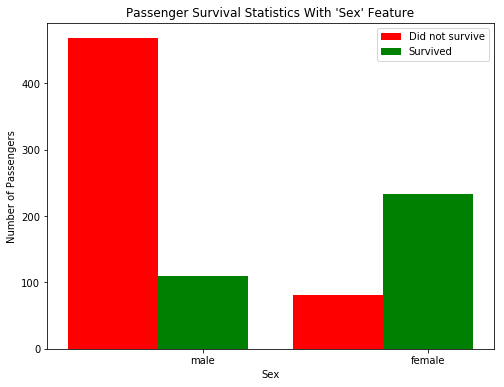

In [9]:
survival_stats(data, outcomes, 'Sex')

观察泰坦尼克号上乘客存活的数据统计，我们可以发现大部分男性乘客在船沉没的时候都遇难了。相反的，大部分女性乘客都在事故中**生还**。让我们在先前推断的基础上继续创建：如果乘客是男性，那么我们就预测他们遇难；如果乘客是女性，那么我们预测他们在事故中活了下来。

将下面的代码补充完整，让函数可以进行正确预测。  

**提示**：您可以用访问 dictionary（字典）的方法来访问船上乘客的每个特征对应的值。例如， `passenger['Sex']` 返回乘客的性别。

In [12]:
def predictions_1(data):
    """ Model with one feature: 
            - Predict a passenger survived if they are female. """
    
    predictions = []
    for _, passenger in data.iterrows():
        
        # Remove the 'pass' statement below 
        # 移除下方的 'pass' 声明
        # and write your prediction conditions here
        # 输入你自己的预测条件
        if passenger['Sex']=='female':
            predictions.append(1)
        else:
            predictions.append(0)
    
    # Return our predictions
    # 返回预测结果
    return pd.Series(predictions)

# Make the predictions
# 进行预测
predictions = predictions_1(data)

### 问题2
当我们预测船上女性乘客全部存活，而剩下的人全部遇难，那么我们预测的准确率会达到多少？

**提示**：运行下面的代码来查看我们预测的准确率。 

In [13]:
print accuracy_score(outcomes, predictions)

Predictions have an accuracy of 78.68%.


**回答**: *Predictions have an accuracy of 78.68%.*

***
仅仅使用乘客性别（Sex）这一特征，我们预测的准确性就有了明显的提高。现在再看一下使用额外的特征能否更进一步提升我们的预测准确度。例如，综合考虑所有在泰坦尼克号上的男性乘客：我们是否找到这些乘客中的一个子集，他们的存活概率较高。让我们再次使用 `survival_stats` 函数来看看每位男性乘客的年龄（Age）。这一次，我们将使用第四个参数来限定柱形图中只有男性乘客。

运行下面这段代码，把男性基于年龄的生存结果绘制出来。

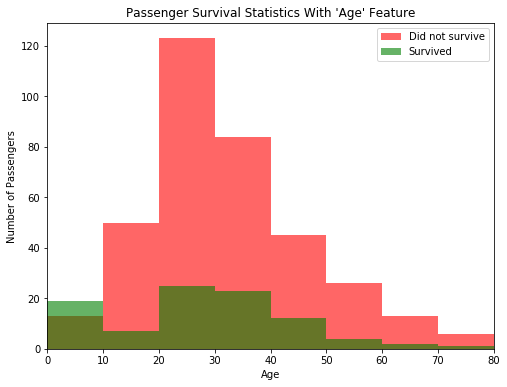

In [14]:
survival_stats(data, outcomes, 'Age', ["Sex == 'male'"])

仔细观察泰坦尼克号存活的数据统计，在船沉没的时候，大部分小于10岁的男孩都活着，而大多数10岁以上的男性都随着船的沉没而**遇难**。让我们继续在先前预测的基础上构建：如果乘客是女性，那么我们就预测她们全部存活；如果乘客是男性并且小于10岁，我们也会预测他们全部存活；所有其它我们就预测他们都没有幸存。  

将下面缺失的代码补充完整，让我们的函数可以实现预测。  
**提示**: 您可以用之前 `predictions_1` 的代码作为开始来修改代码，实现新的预测函数。

In [101]:
def predictions_2(data):
    """ Model with two features: 
            - Predict a passenger survived if they are female.
            - Predict a passenger survived if they are male and younger than 10. """
    
    predictions = []
    for _, passenger in data.iterrows():
        
        # Remove the 'pass' statement below 
        # 移除下方的 'pass' 声明
        # and write your prediction conditions here
        # 输入你自己的预测条件
        if passenger['Sex']=='female':
            predictions.append(1)
        elif passenger['Age']<10:
            predictions.append(1)
        else:
            predictions.append(0)
    
    # Return our predictions
    # 返回预测结果
    return pd.Series(predictions)

# Make the predictions
# 进行预测
predictions = predictions_2(data)

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      1
8      1
9      1
10     1
11     1
12     0
13     0
14     1
15     1
16     1
17     0
18     1
19     1
20     0
21     0
22     1
23     0
24     1
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    1
864    0
865    1
866    1
867    0
868    0
869    1
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    1
883    0
884    0
885    1
886    0
887    1
888    1
889    0
890    0
Length: 891, dtype: int64


### 问题3

当预测所有女性以及小于10岁的男性都存活的时候，预测的准确率会达到多少？

**提示：**运行下面的代码来查看预测的准确率。

In [27]:
print accuracy_score(outcomes, predictions)

Predictions have an accuracy of 79.24%.


**回答**: *Predictions have an accuracy of 79.24%*

***
添加年龄（Age）特征与性别（Sex）的结合比单独使用性别（Sex）也提高了不少准确度。现在该你来做预测了：找到一系列的特征和条件来对数据进行划分，使得预测结果提高到80%以上。这可能需要多个特性和多个层次的条件语句才会成功。你可以在不同的条件下多次使用相同的特征。**Pclass**，**Sex**，**Age**，**SibSp** 和 **Parch** 是建议尝试使用的特征。   

使用 `survival_stats` 函数来观测泰坦尼克号上乘客存活的数据统计。  
**提示:** 要使用多个过滤条件，把每一个条件放在一个列表里作为最后一个参数传递进去。例如: `["Sex == 'male'", "Age < 18"]`

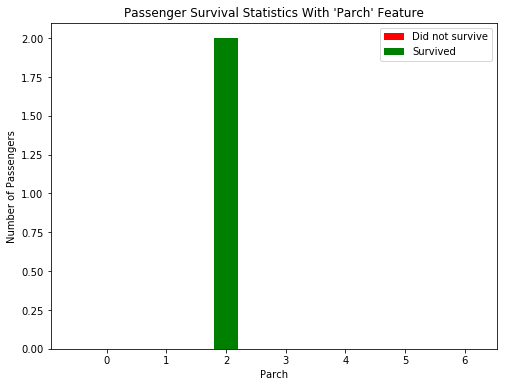

In [143]:
survival_stats(data, outcomes, "Parch",["Sex == 'male'","Parch == 2","SibSp == 0","Pclass == 2","Age < 10"])

当查看和研究了图形化的泰坦尼克号上乘客的数据统计后，请补全下面这段代码中缺失的部分，使得函数可以返回你的预测。   
在到达最终的预测模型前请确保记录你尝试过的各种特征和条件。   
**提示:** 您可以用之前 `predictions_2` 的代码作为开始来修改代码，实现新的预测函数。

In [11]:
def predictions_3(full_data):
    """ Model with multiple features. Makes a prediction with an accuracy of at least 80%. """
    
    predictions = []
    for _, passenger in data.iterrows():
        
        # Remove the 'pass' statement below 
        # and write your prediction conditions here
        if passenger['Sex']=='female':
            if passenger['Pclass']==3 and passenger['Age']<50 and passenger['Age']>40:
                predictions.append(0)
            else:
                predictions.append(1)
            
        if passenger['Sex']=='male':
            if passenger['Age']<10:
                predictions.append(1)
            else:
                predictions.append(0)
            
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_3(full_data)
predictions.to_csv("outcome.csv")

### 结论

请描述你实现80%准确度的预测模型所经历的步骤。您观察过哪些特征？某些特性是否比其他特征更有帮助？你用了什么条件来预测生还结果？你最终的预测的准确率是多少？
**提示:**运行下面的代码来查看你的预测准确度。

#### 思路
1. 首先发现性别字段对生存率有很大影响，并且可以将所有乘客分成互斥的子集，所以性别在预测生存率的逻辑中具有最高的层次，女性生还，男性死亡，这是一个最粗糙的假设

2. 猜想阶级和生存率也有关系，使用`Pclass`可视化发现底层乘客的死亡率十分突出。
3. 在社会阶层的前提下对女性的死亡率进行探索，发现中年（40-50）岁的底层女性乘客生存率为0，这是一个新的有用的信息，可以添加到对女性乘客的预测之中，因为之前女性乘客预测为全部生还（显然不太准确），而这个信息回答了什么情况下女性乘客不能生还

In [103]:
print accuracy_score(outcomes, predictions)

Predictions have an accuracy of 80.25%.


**回答**: *Predictions have an accuracy of 80.25%.*

# 结论

经过了数次对数据的探索和分类，你创建了一个预测泰坦尼克号乘客存活率的有用的算法。在这个项目中你手动地实现了一个简单的机器学习模型——决策树（decision tree）。决策树每次按照一个特征把数据分割成越来越小的群组（被称为 *nodes*）。每次数据的一个子集被分出来，如果分割结果的子集中的数据比之前更同质（包含近似的标签），我们的预测也就更加准确。电脑来帮助我们做这件事会比手动做更彻底，更精确。[这个链接](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)提供了另一个使用决策树做机器学习入门的例子。  

决策树是许多**监督学习**算法中的一种。在监督学习中，我们关心的是使用数据的特征并根据数据的结果标签进行预测或建模。也就是说，每一组数据都有一个真正的结果值，不论是像泰坦尼克号生存数据集一样的标签，或者是连续的房价预测。

### 问题5

想象一个真实世界中应用监督学习的场景，你期望预测的结果是什么？举出两个在这个场景中能够帮助你进行预测的数据集中的特征。

**回答**: 
   有关图书馆借阅书籍的监督学习：一个大学有多个学院，每位读者借阅书籍的需求显然是不完全一样的，在这个情境中，读者的年级、专业、性别、学习成绩都可能帮助我们预测他们的书籍需求。
   例如，文学院的学生会更多地借阅文学评论的书籍，而大三的学生会较多地借阅考研辅导类的书籍。
    

> **注意**: 当你写完了所有的代码，并且回答了所有的问题。你就可以把你的 iPython Notebook 导出成 HTML 文件。你可以在菜单栏，这样导出**File -> Download as -> HTML (.html)** 把这个 HTML 和这个 iPython notebook 一起做为你的作业提交。

---
翻译：毛礼建 ｜ 校译：黄强 ｜ 审译：曹晨巍